# DS MINOR PROJECT SEPT 2022
# MOBILE PRICE PREDICTION USING MACHINE LEARNING
# BY SHIVAM GAONKAR


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [3]:
train_data=pd.read_csv(r'C:\Users\Acer\Desktop\DS Minor\Mobile-Price-Classification-master\Mobile-Price-Classification-master\train.csv')

# OVERVIEW OF DATA

In [4]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# TYPE OF DATA IN DATASET

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# REMOVE THE DATAPOINTS WITH MISSING DATA

In [6]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

# VISUALIZE NO OF ELEMENTS IN EACH SET

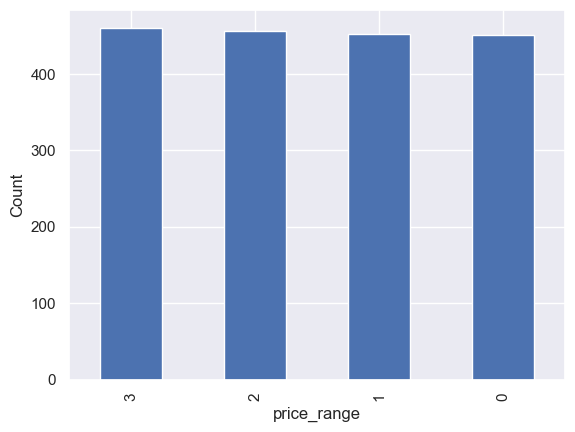

In [9]:
#classes
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

# LET US SEE IF THERE IS ANY MISSING DATA

In [10]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

# LET US SPLIT THE DATA

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [14]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
60,1484,0,3.0,0,3,0,12,0.6,134,3,5,916,969,1457,14,4,20,1,1,0
1691,1603,1,0.5,1,1,1,17,0.5,114,2,8,430,1207,1637,17,3,11,1,0,1
747,1648,1,0.5,0,1,1,17,0.9,142,2,3,1119,1238,1184,6,2,2,1,0,1
402,1479,0,0.5,0,8,0,19,0.6,156,3,10,180,1476,3323,13,12,6,1,0,1
199,1905,0,0.6,1,9,1,36,0.4,119,3,20,825,1542,1287,13,4,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,581,0,0.6,0,5,1,56,0.2,180,2,10,523,565,354,10,4,13,1,1,1
553,1544,0,2.3,0,12,1,45,0.1,113,8,20,236,857,1300,8,7,18,1,1,0
589,1219,0,1.0,1,0,0,17,0.7,196,5,4,473,1022,705,11,3,6,0,1,1
1340,1469,0,0.5,0,3,1,58,0.5,150,7,8,1699,1850,1571,17,16,2,1,0,0


In [16]:
y_train

60      1
1691    1
747     1
402     3
199     1
       ..
1758    0
553     1
589     0
1340    2
194     2
Name: price_range, Length: 1456, dtype: int64

In [25]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [27]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

# APPLYING MODELS
# 1. SVM

In [22]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [23]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



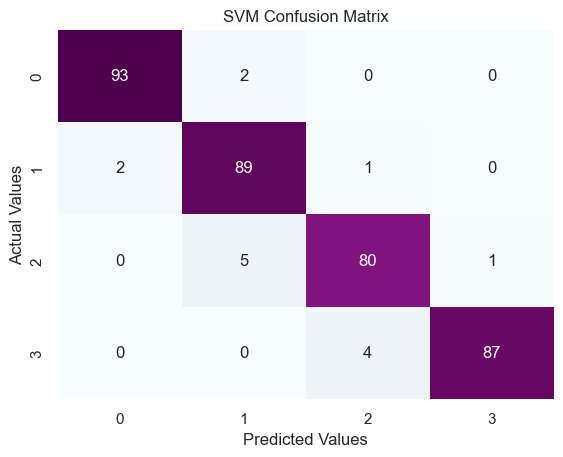

In [28]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

In [55]:
ac_svm='0.9587912087912088';

# 2. RANDOM FOREST CLASSIFICATION-

In [26]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



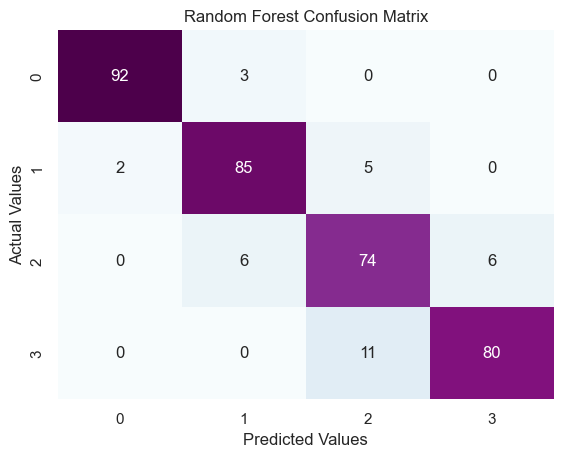

In [29]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

In [56]:
ac_rf='0.9093406593406593';

# 3. KNN CLASSIFIER-

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [31]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



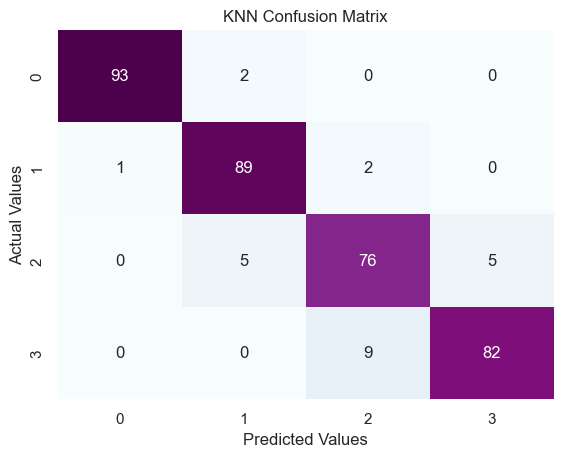

In [32]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

In [57]:
ac_knn='0.9340659340659341';

# 4. LOGISTIC REGRESSION-

In [41]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [37]:
logmodel.fit(X_train,y_train)


C:\Python\Python11\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
logmodel.score(X_test,y_test)

0.6189683860232945

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
pred2 = logmodel.predict(X_test)

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.77      0.75      0.76       141
           2       0.74      0.78      0.76       148
           3       0.92      0.83      0.87       159

    accuracy                           0.82       601
   macro avg       0.82      0.82      0.82       601
weighted avg       0.83      0.82      0.82       601



In [75]:
matrix=confusion_matrix(y_test,pred2)
print(matrix)

[[120  32   1   0]
 [ 23  67  41  10]
 [  1  39  68  40]
 [  0   2  40 117]]


In [60]:
ac_lr='0.6189683860232945',

# 5 DECISION TREE-

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
dtree.score(X_test,y_test)

0.8236272878535774

In [76]:
pred1 = dtree.predict(X_test)

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.77      0.75      0.76       141
           2       0.74      0.78      0.76       148
           3       0.92      0.83      0.87       159

    accuracy                           0.82       601
   macro avg       0.82      0.82      0.82       601
weighted avg       0.83      0.82      0.82       601



In [78]:
matrix=confusion_matrix(y_test,pred1)
print(matrix)

[[142  11   0   0]
 [ 22 106  13   0]
 [  0  21 115  12]
 [  0   0  27 132]]


In [59]:
ac_dt='0.8236272878535774';

# PREDICT THE PRICE FOR TEST DATA

In [49]:
data_test=pd.read_csv(r'C:\Users\Acer\Desktop\DS Minor\Mobile-Price-Classification-master\Mobile-Price-Classification-master\test.csv')

In [50]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [51]:
data_test=data_test.drop('id',axis=1)

In [52]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [53]:
predicted_price=knn.predict(data_test)

In [54]:
predicted_price

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 2, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# MODEL ACCURACIES-

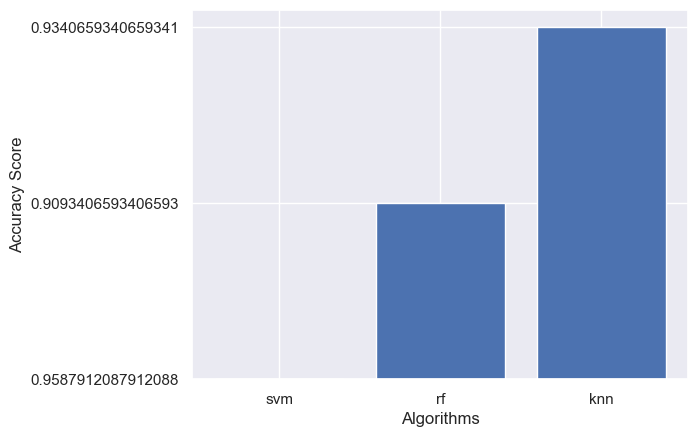

In [64]:
plt.bar(x=['svm','rf','knn'],height=[ac_svm,ac_rf,ac_knn])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

# KNN HAS THE BEST ACCURACY